Patrick Jean-Baptiste

The CUNY Graduate Center

# Description: Visual Emotion Recognition

This notebook performs the visual emotion recognition using images of actors' faces expressing an emotion. The images were previously extracted from the video only and audio-visual files of the RAVDESS dataset for both speech and song. The labels that indicate the type of emotion expressed in the images were previously stored as well. The overall objective is to create a visual model using TensorFlow to recognize emotions from images.

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from get_images import get_images
from get_data import get_data
from match_files import match_files

Retrieve the images of the actors' faces expressing an emotion along with the corresponding labels that indicate the type of emotion expressed in the images.

In [2]:
img_dir = "Emotion_Images"

Emotion_Images, Emotion_Labels, Emotion_File_Names, img_size = get_images(img_dir)

Print the shape of the array containing the images of expressed emotion.

In [3]:
print(Emotion_Images.shape)

(4902, 128, 128, 3)


Print the shape of the array containing the labels that correspond to the types of emotion expressed.

In [4]:
print(Emotion_Labels.shape)

(4902,)


Split the audio emotion data into a train, validation, and test set. 

In [5]:
train = pd.read_csv("DatasetSplitCSV/train.csv",header=None)
val = pd.read_csv("DatasetSplitCSV/valid.csv",header=None)
test = pd.read_csv("DatasetSplitCSV/test.csv",header=None)

In [6]:
train.describe()

,0,1
count,1470,1470
unique,1470,8
top,03-01-03-02-02-01-07.wav,sad
freq,1,232


In [7]:
val.describe()

,0,1
count,491,491
unique,491,8
top,03-02-04-01-02-02-20.wav,happy
freq,1,88


In [8]:
test.describe()

,0,1
count,491,491
unique,491,8
top,03-01-04-01-02-02-22.wav,fear
freq,1,78


Retrieve the names of the image files along with the corresponding labels that correlate to the train, validation, and test sets from the audio emotion data.

In [9]:
train_files, train_labels = get_data(train)
val_files, val_labels = get_data(val)
test_files, test_labels = get_data(test)

Match the image file names with the images of expressed emotion in order to create the train, validation, and test sets for visual emotion.

In [10]:
X_train, y_train = match_files(Emotion_File_Names, Emotion_Images, Emotion_Labels, train_files)
X_val, y_val = match_files(Emotion_File_Names, Emotion_Images, Emotion_Labels, val_files)
X_test, y_test = match_files(Emotion_File_Names, Emotion_Images, Emotion_Labels, test_files)

Define the visual model architecture.

In [11]:
def visual_model(img_size):
    
    # Create a sequential model.
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(img_size, img_size, 3), 
                                 padding='valid', strides=1))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='valid', strides=1))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', padding='valid', strides=1))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(tf.keras.layers.Flatten()) 
    model.add(tf.keras.layers.Dense(8, activation='softmax')) 
    
    return model
              


Create the visual model.

In [12]:
visual_emotion_model = visual_model(img_size)

Compile the visual model.

In [13]:
visual_emotion_model.compile(loss='mse', 
                    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
                    metrics=['mse', 'RootMeanSquaredError', 'mae', 'accuracy']) 

Train the visual model.

In [14]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

history = visual_emotion_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=150, 
                                   callbacks=[early])

Train on 2824 samples, validate on 942 samples
Epoch 1/5
2824/2824 [==============================] - 700s 248ms/sample - loss: 0.2106 - mse: 0.2106 - RootMeanSquaredError: 0.4589 - mae: 0.2109 - accuracy: 0.1565 - val_loss: 0.2102 - val_mse: 0.2102 - val_RootMeanSquaredError: 0.4585 - val_mae: 0.2102 - val_accuracy: 0.1592
Epoch 2/5
2824/2824 [==============================] - 816s 289ms/sample - loss: 0.2105 - mse: 0.2105 - RootMeanSquaredError: 0.4588 - mae: 0.2105 - accuracy: 0.1579 - val_loss: 0.2102 - val_mse: 0.2102 - val_RootMeanSquaredError: 0.4585 - val_mae: 0.2102 - val_accuracy: 0.1592
Epoch 3/5
2824/2824 [==============================] - 661s 234ms/sample - loss: 0.2105 - mse: 0.2105 - RootMeanSquaredError: 0.4588 - mae: 0.2105 - accuracy: 0.1579 - val_loss: 0.2102 - val_mse: 0.2102 - val_RootMeanSquaredError: 0.4585 - val_mae: 0.2102 - val_accuracy: 0.1592
Epoch 4/5
2824/2824 [==============================] - 1087s 385ms/sample - loss: 0.2105 - mse: 0.2105 - RootMeanSqu

Evaluate the visual model.

In [15]:
scores = visual_emotion_model.evaluate(X_test, y_test)

948/948 [==============================] - 36s 38ms/sample - loss: 0.2089 - mse: 0.2089 - RootMeanSquaredError: 0.4570 - mae: 0.2089 - accuracy: 0.1646


Plot the training mean squared error, root mean squared error, mean absolute error, and accuracy for the visual model.

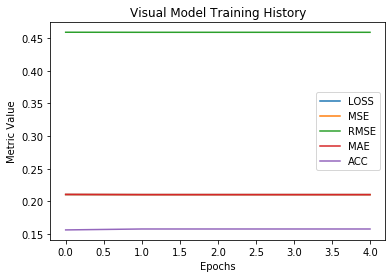

In [16]:
plt.title('Visual Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.plot(history.history['loss'], label='LOSS')
plt.plot(history.history['mse'], label='MSE')
plt.plot(history.history['RootMeanSquaredError'], label='RMSE')
plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['accuracy'], label='ACC')
plt.legend()
plt.show()

Plot the validation mean squared error, root mean squared error, mean absolute error, and accuracy for the visual model.

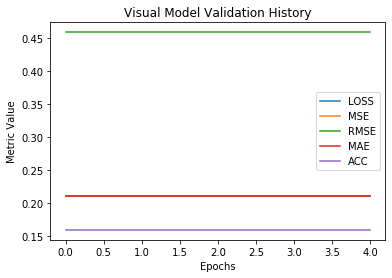

In [17]:
plt.title('Visual Model Validation History')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.plot(history.history['val_loss'], label='LOSS')
plt.plot(history.history['val_mse'], label='MSE')
plt.plot(history.history['val_RootMeanSquaredError'], label='RMSE')
plt.plot(history.history['val_mae'], label='MAE')
plt.plot(history.history['val_accuracy'], label='ACC')
plt.legend()
plt.show()